In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from IPython.display import display, HTML
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pickle
import seaborn as sns

In [3]:
data = pd.read_csv("data/housing.csv", sep=";")

Aufgabe 1:
Teil 1:
- Mehrdimensionale Lineare Regression auf einem Datensatz (https://github.com/ageron/handson-ml/blob/master/datasets/housing/)
- Vorverarbeitung der Daten (Skalierung, kategorische Attribute: http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)
- Aufteilung in Test & Train
- Berechnung der Fehler der Vorhersage auf dem Test-Datensatz
- Anpassung der Inputdaten (Feature Engineering)
- Niedrigster MSE auf einem (für alle der gleiche) Test-Datensatz gewinnt
Teil 2
So wie Teil 1 nur mit kNeighborsRegression als Vorhersageverfahren

# Looking at the data

In [4]:
print(data.isnull().sum().sum()) #nr of nans
#data.isnull().values.any() # only gives true/false
print(data.shape)

207
(20640, 10)


In [5]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY

In [6]:
data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# Preprocessing

### Encoding categorical features

In [7]:
enc_labels = preprocessing.LabelEncoder()

In [8]:
enc_labels.fit(data["ocean_proximity"])
new_ocean_prox = enc_labels.transform(data["ocean_proximity"])
print(type(new_ocean_prox))

<class 'numpy.ndarray'>


In [9]:
enc_ohe = preprocessing.OneHotEncoder(sparse=False) #easier to read
new_ocean_arr = enc_ohe.fit_transform(new_ocean_prox.reshape(-1, 1))
new_ocean_df = pd.DataFrame(data = new_ocean_arr, columns = list(enc_labels.classes_))

In [10]:
data_new = pd.concat([data,new_ocean_df],axis=1)
display(data_new)
data_new.drop("ocean_proximity",axis = 1,inplace = True)
data_new

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
5        -122.25     37.85                  52          919           213.0   
6        -122.25     37.84                  52         2535           489.0   
7        -122.25     37.84                  52         3104           687.0   
8        -122.26     37.84                  42         2555           665.0   
9        -122.25     37.84                  52         3549           707.0   
10       -122.26     37.85                  52         2202           434.0   
11       -122.26     37.85                  52         3503           752.0   
12       -122.26     37.85                  52         2491           474.0   
13       -122.26     37.84                  52          696           191.0   
14       -122.26     37.85                  52         2643           626.0   
15       -122.26     37.85                  50         1120           283.0   
16       -122.27     37.85                  52         1966           347.0   
17       -122.27     37.85                  52         1228           293.0   
18       -122.26     37.84                  50         2239           455.0   
19       -122.27     37.84                  52         1503           298.0   
20       -122.27     37.85                  40          751           184.0   
21       -122.27     37.85                  42         1639           367.0   
22       -122.27     37.84                  52         2436           541.0   
23       -122.27     37.84                  52         1688           337.0   
24       -122.27     37.84                  52         2224           437.0   
25       -122.28     37.85                  41          535           123.0   
26       -122.28     37.85                  49         1130           244.0   
27       -122.28     37.85                  52         1898           421.0   
28       -122.28     37.84                  50         2082           492.0   
29       -122.28     37.84                  52          729           160.0   
...          ...       ...                 ...          ...             ...   
20610    -121.56     39.10                  28         2130           484.0   
20611    -121.55     39.10                  27         1783           441.0   
20612    -121.56     39.08                  26         1377           289.0   
20613    -121.55     39.09                  31         1728           365.0   
20614    -121.54     39.08                  26         2276           460.0   
20615    -121.54     39.08                  23         1076           216.0   
20616    -121.53     39.08                  15         1810           441.0   
20617    -121.53     39.06                  20          561           109.0   
20618    -121.55     39.06                  25         1332           247.0   
20619    -121.56     39.01                  22         1891           340.0   
20620    -121.48     39.05                  40          198            41.0   
20621    -121.47     39.01                  37         1244           247.0   
20622    -121.44     39.00                  20          755           147.0   
20623    -121.37     39.03                  32         1158           244.0   
20624    -121.41     39.04                  16         1698           300.0   
20625    -121.52     39.12                  37          102            17.0   
20626    -121.43     39.18                  36         1124           184.0   
20627    -121.32     39.13                   5          358            65.0   
20628    -121.48     39.10                  19         20

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
5        -122.25     37.85                  52          919           213.0   
6        -122.25     37.84                  52         2535           489.0   
7        -122.25     37.84                  52         3104           687.0   
8        -122.26     37.84                  42         2555           665.0   
9        -122.25     37.84                  52         3549           707.0   
10       -122.26     37.85                  52         2202           434.0   
11       -122.26     37.85                  52         3503           752.0   
12       -122.26     37.85                  52         2491           474.0   
13       -122.26     37.84                  52          696           191.0   
14       -122.26     37.85                  52         2643           626.0   
15       -122.26     37.85                  50         1120           283.0   
16       -122.27     37.85                  52         1966           347.0   
17       -122.27     37.85                  52         1228           293.0   
18       -122.26     37.84                  50         2239           455.0   
19       -122.27     37.84                  52         1503           298.0   
20       -122.27     37.85                  40          751           184.0   
21       -122.27     37.85                  42         1639           367.0   
22       -122.27     37.84                  52         2436           541.0   
23       -122.27     37.84                  52         1688           337.0   
24       -122.27     37.84                  52         2224           437.0   
25       -122.28     37.85                  41          535           123.0   
26       -122.28     37.85                  49         1130           244.0   
27       -122.28     37.85                  52         1898           421.0   
28       -122.28     37.84                  50         2082           492.0   
29       -122.28     37.84                  52          729           160.0   
...          ...       ...                 ...          ...             ...   
20610    -121.56     39.10                  28         2130           484.0   
20611    -121.55     39.10                  27         1783           441.0   
20612    -121.56     39.08                  26         1377           289.0   
20613    -121.55     39.09                  31         1728           365.0   
20614    -121.54     39.08                  26         2276           460.0   
20615    -121.54     39.08                  23         1076           216.0   
20616    -121.53     39.08                  15         1810           441.0   
20617    -121.53     39.06                  20          561           109.0   
20618    -121.55     39.06                  25         1332           247.0   
20619    -121.56     39.01                  22         1891           340.0   
20620    -121.48     39.05                  40          198            41.0   
20621    -121.47     39.01                  37         1244           247.0   
20622    -121.44     39.00                  20          755           147.0   
20623    -121.37     39.03                  32         1158           244.0   
20624    -121.41     39.04                  16         1698           300.0   
20625    -121.52     39.12                  37          102            17.0   
20626    -121.43     39.18                  36         1124           184.0   
20627    -121.32     39.13                   5          358            65.0   
20628    -121.48     39.10                  19         20

### (Replacing NaNs)

In [11]:
# replacing the 207 NaNs in column total_bedroom by mean of the column

In [12]:
"""
data_new["total_bedrooms"].fillna(data_new["total_bedrooms"].mean(),inplace = True)
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 300): # shows more of the df
    display(data_new["total_bedrooms"])
    """

'\ndata_new["total_bedrooms"].fillna(data_new["total_bedrooms"].mean(),inplace = True)\nwith pd.option_context(\'display.max_rows\', 1000, \'display.max_columns\', 300): # shows more of the df\n    display(data_new["total_bedrooms"])\n    '

## Scatter matrices

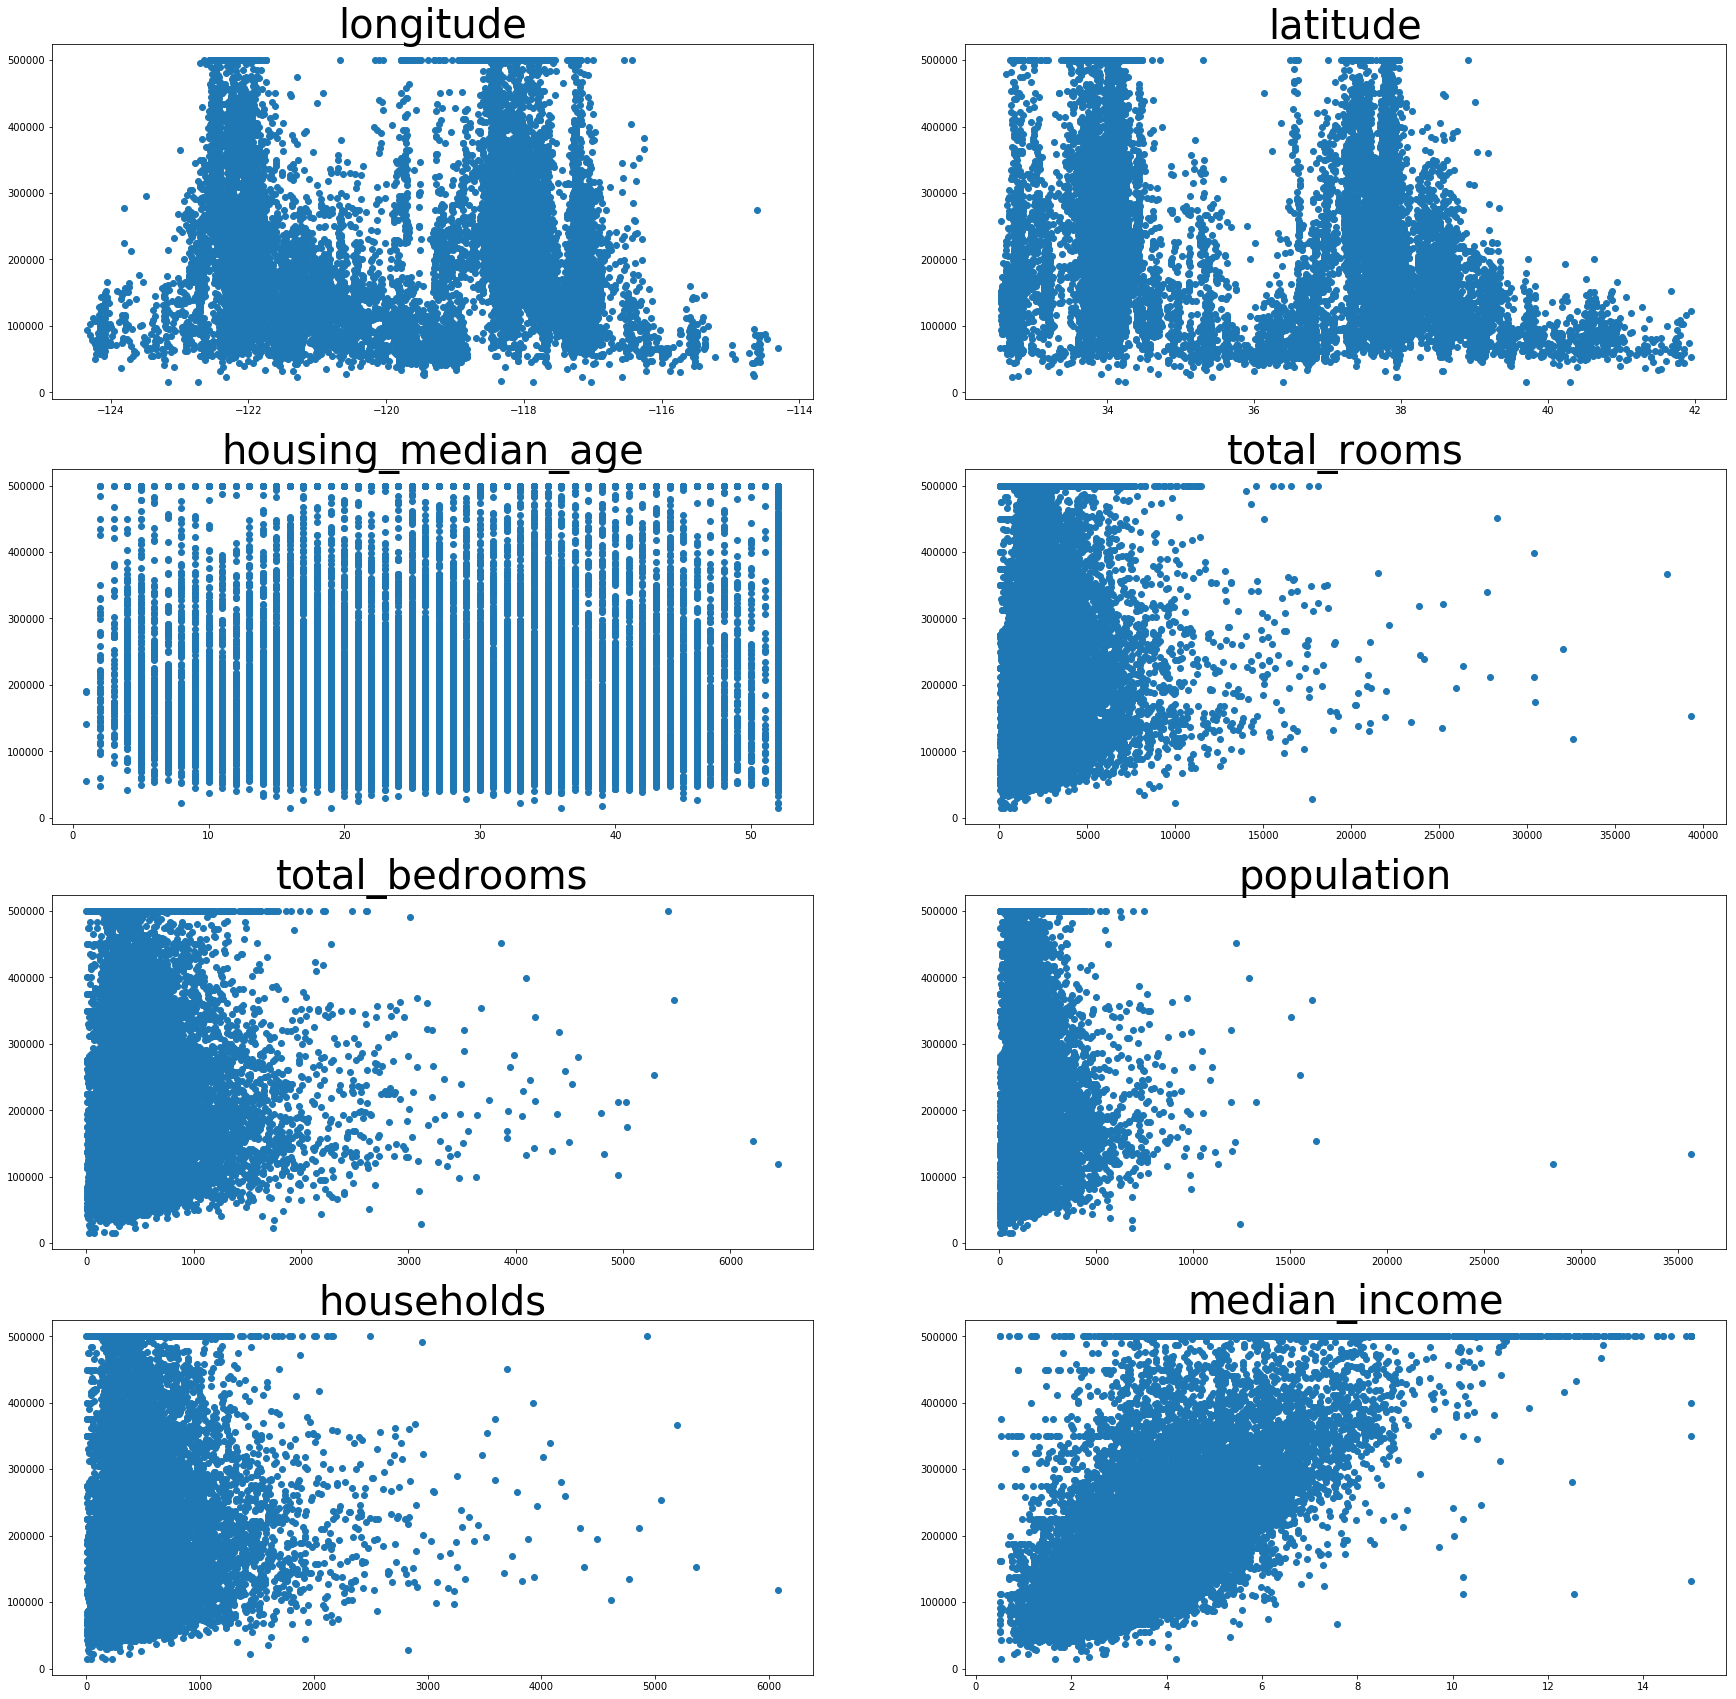

In [13]:
fig = plt.figure(figsize = (30,30))
for col in range(0,8):
    plt.subplot(4,2,col+1)
    plt.scatter(data_new.iloc[:,col],data_new["median_house_value"])
    plt.title(data_new.columns[col],fontsize=40)

### Dropping rows with NaNs

In [14]:
data_new["total_bedrooms"].isnull().sum()

207

In [15]:
cols = data_new.columns.tolist()

In [16]:
data_new.dropna(inplace = True)
data_new.reset_index(inplace = True)
data_new.head()

index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                  41          880   
1      1    -122.22     37.86                  21         7099   
2      2    -122.24     37.85                  52         1467   
3      3    -122.25     37.85                  52         1274   
4      4    -122.25     37.85                  52         1627   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0         322         126         8.3252              452600   
1          1106.0        2401        1138         8.3014              358500   
2           190.0         496         177         7.2574              352100   
3           235.0         558         219         5.6431              341300   
4           280.0         565         259         3.8462              342200   

   <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  
0        0.0     0.0     0.0       1.0         0.0  
1        0.0     0.0     0.0       1.0         0.0  
2        0.0     0.0     0.0       1.0         0.0  
3        0.0     0.0     0.0       1.0         0.0  
4        0.0     0.0     0.0       1.0         0.0

In [17]:
data_new = data_new[['longitude','latitude','housing_median_age','total_rooms', 'total_bedrooms', 'population', 'households','median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]

In [18]:
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 300): # shows more of the df
    display(data_new)
data_new.shape

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
5        -122.25     37.85                  52          919           213.0   
6        -122.25     37.84                  52         2535           489.0   
7        -122.25     37.84                  52         3104           687.0   
8        -122.26     37.84                  42         2555           665.0   
9        -122.25     37.84                  52         3549           707.0   
10       -122.26     37.85                  52         2202           434.0   
11       -122.26     37.85                  52         3503           752.0   
12       -122.26     37.85                  52         2491           474.0   
13       -122.26     37.84                  52          696           191.0   
14       -122.26     37.85                  52         2643           626.0   
15       -122.26     37.85                  50         1120           283.0   
16       -122.27     37.85                  52         1966           347.0   
17       -122.27     37.85                  52         1228           293.0   
18       -122.26     37.84                  50         2239           455.0   
19       -122.27     37.84                  52         1503           298.0   
20       -122.27     37.85                  40          751           184.0   
21       -122.27     37.85                  42         1639           367.0   
22       -122.27     37.84                  52         2436           541.0   
23       -122.27     37.84                  52         1688           337.0   
24       -122.27     37.84                  52         2224           437.0   
25       -122.28     37.85                  41          535           123.0   
26       -122.28     37.85                  49         1130           244.0   
27       -122.28     37.85                  52         1898           421.0   
28       -122.28     37.84                  50         2082           492.0   
29       -122.28     37.84                  52          729           160.0   
30       -122.28     37.84                  49         1916           447.0   
31       -122.28     37.84                  52         2153           481.0   
32       -122.27     37.84                  48         1922           409.0   
33       -122.27     37.83                  49         1655           366.0   
34       -122.27     37.83                  51         2665           574.0   
35       -122.27     37.83                  49         1215           282.0   
36       -122.27     37.83                  48         1798           432.0   
37       -122.28     37.83                  52         1511           390.0   
38       -122.26     37.83                  52         1470           330.0   
39       -122.26     37.83                  52         2432           715.0   
40       -122.26     37.83                  52         1665           419.0   
41       -122.26     37.83                  51          936           311.0   
42       -122.26     37.84                  49          713           202.0   
43       -122.26     37.84                  52          950           202.0   
44       -122.26     37.83                  52         1443           311.0   
45       -122.26     37.83                  52         1656           420.0   
46       -122.26     37.83                  50         1125           322.0   
47       -122.27     37.82                  43         1007           312.0   
48       -122.26     37.82                  40          624           195.0   
49       -122.27     37.82                  40          9

(20433, 14)

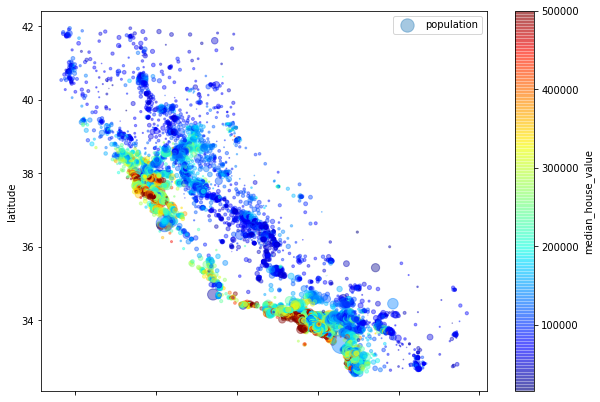

In [19]:
data_new.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
                s=data_new["population"]/100,label="population",figsize=(10,7),
                c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

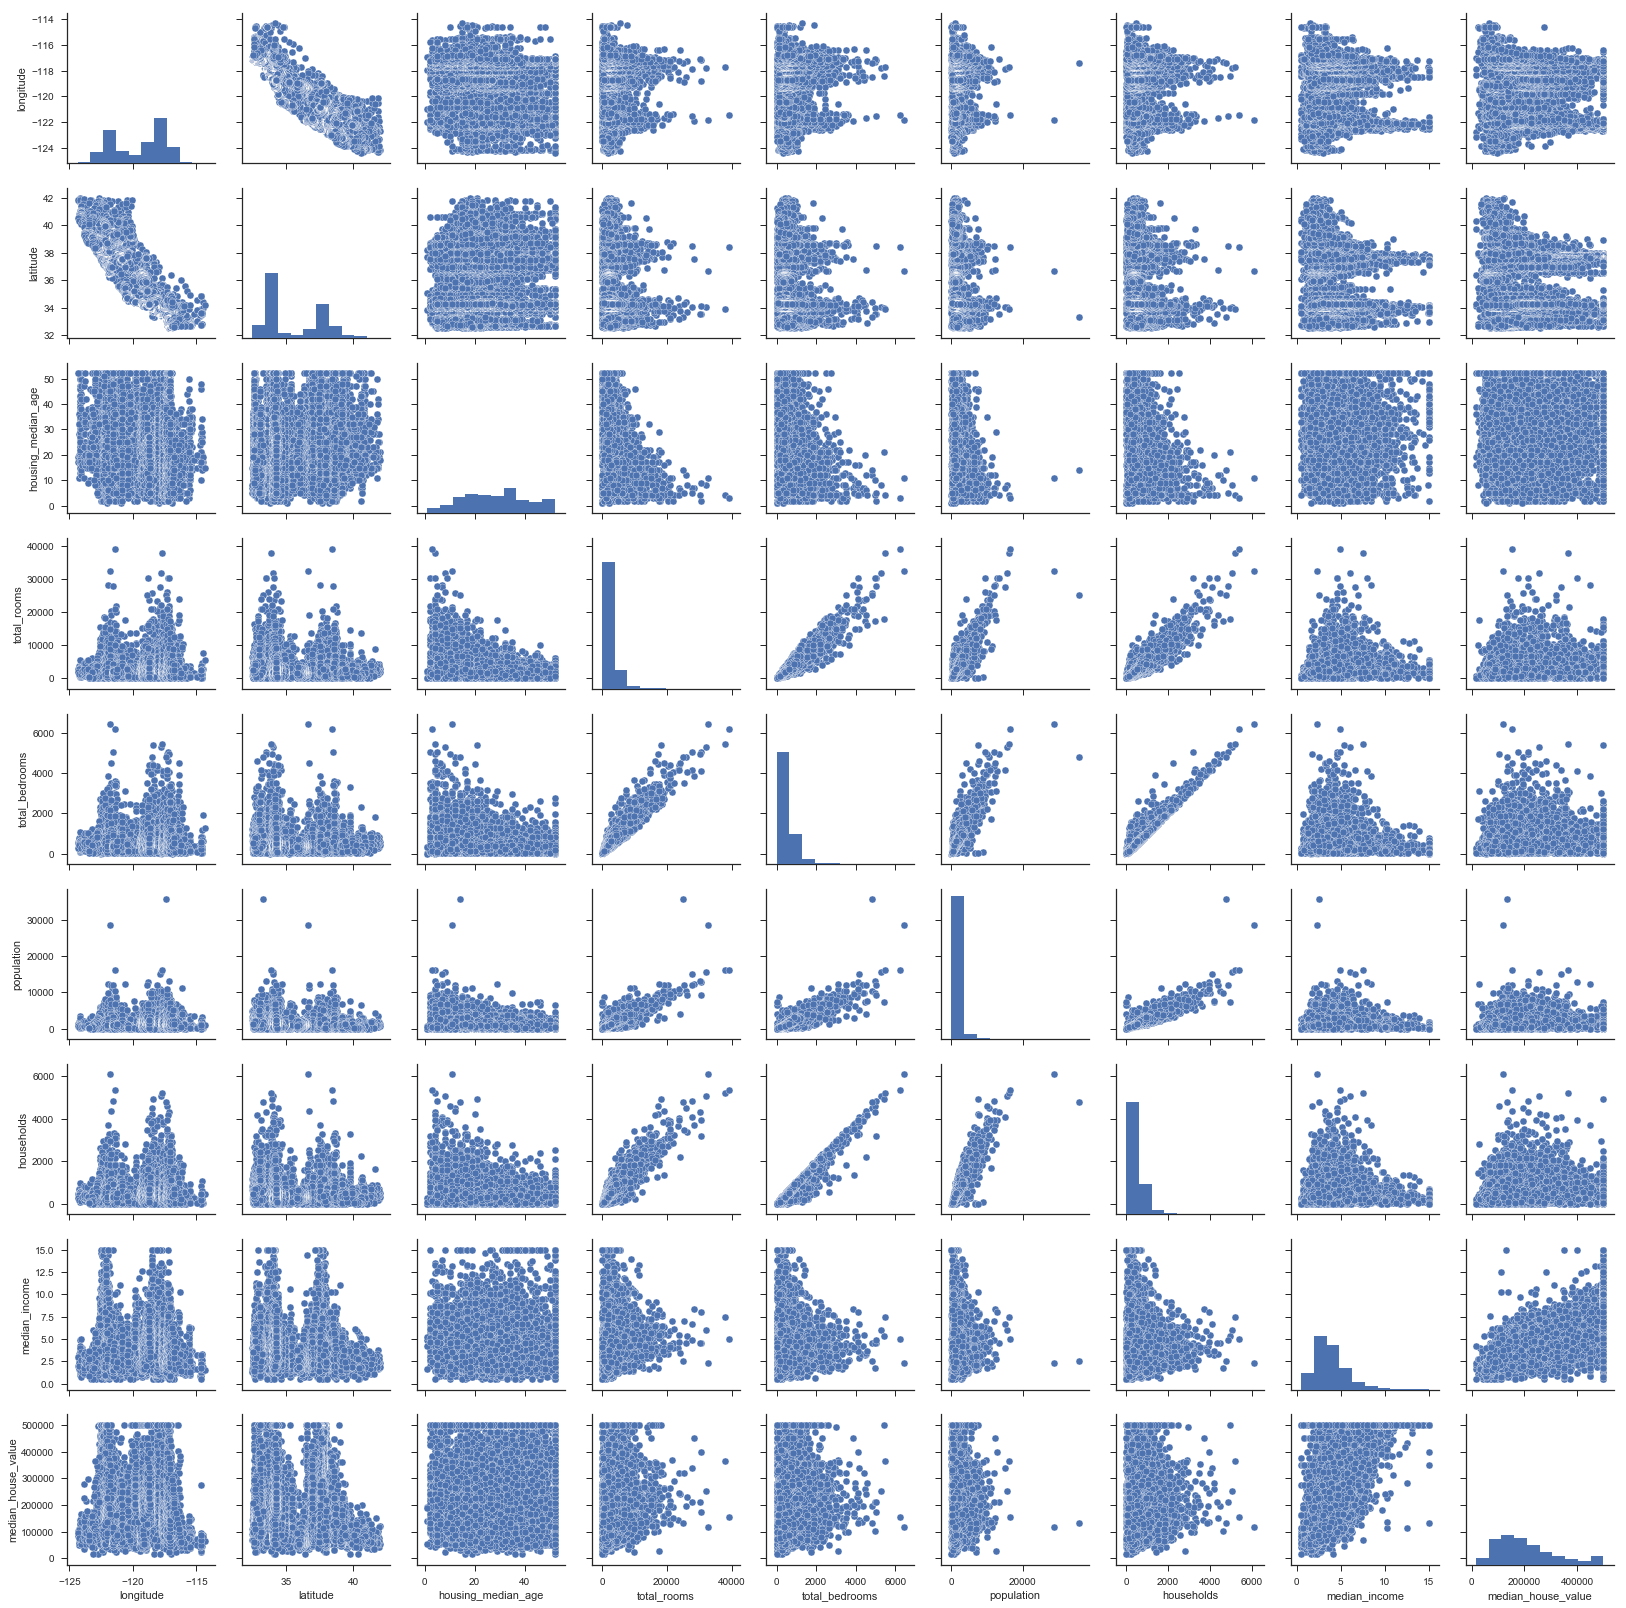

In [20]:
import seaborn as sns
sns.set(style="ticks")
plot_vars = data_new.iloc[:,[0,1,2,3,4,5,6,7,13]]
sns.pairplot(plot_vars)


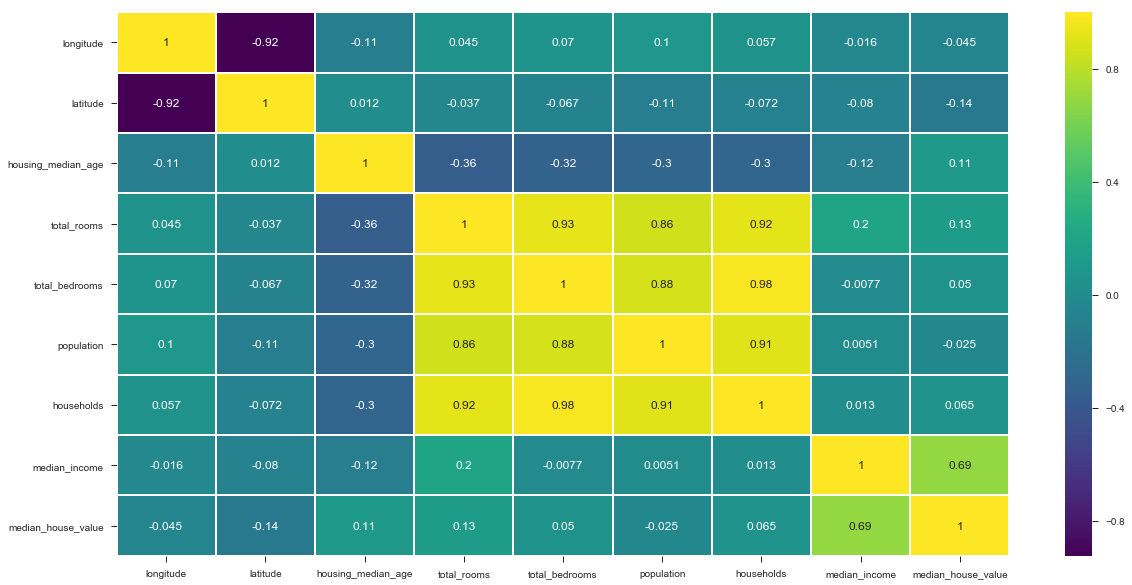

In [21]:
corr_matrix = data_new.iloc[:,[0,1,2,3,4,5,6,7,13]].corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='viridis');

In [22]:
rooms_combined = data_new.copy()
rooms_combined["bedr_per_rooms"] = rooms_combined["total_bedrooms"]/rooms_combined["total_rooms"]
rooms_combined.drop(["total_rooms","total_bedrooms"],axis=1,inplace=True)
rooms_combined = rooms_combined[['longitude','latitude','housing_median_age', 'bedr_per_rooms', 'population', 'households','median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]
rooms_combined.head()

longitude  latitude  housing_median_age  bedr_per_rooms  population  \
0    -122.23     37.88                  41        0.146591         322   
1    -122.22     37.86                  21        0.155797        2401   
2    -122.24     37.85                  52        0.129516         496   
3    -122.25     37.85                  52        0.184458         558   
4    -122.25     37.85                  52        0.172096         565   

   households  median_income  <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  \
0         126         8.3252        0.0     0.0     0.0       1.0         0.0   
1        1138         8.3014        0.0     0.0     0.0       1.0         0.0   
2         177         7.2574        0.0     0.0     0.0       1.0         0.0   
3         219         5.6431        0.0     0.0     0.0       1.0         0.0   
4         259         3.8462        0.0     0.0     0.0       1.0         0.0   

   median_house_value  
0              452600  
1              358500  
2              352100  
3              341300  
4              342200

In [23]:
"""corr_matrix = rooms_combined.iloc[:,[0,1,2,3,4,5,6,12]].corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='viridis');
"""

"corr_matrix = rooms_combined.iloc[:,[0,1,2,3,4,5,6,12]].corr()\nplt.subplots(figsize=(20,10))\nsns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='viridis');\n"

In [24]:
rooms_pophouse_comb = rooms_combined.copy()
rooms_pophouse_comb["househ_per_pop"] = rooms_pophouse_comb["households"]/rooms_pophouse_comb["population"]
rooms_pophouse_comb = rooms_pophouse_comb[['longitude','latitude','housing_median_age', 'bedr_per_rooms', 'househ_per_pop', 'median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]
rooms_pophouse_comb.head()

longitude  latitude  housing_median_age  bedr_per_rooms  househ_per_pop  \
0    -122.23     37.88                  41        0.146591        0.391304   
1    -122.22     37.86                  21        0.155797        0.473969   
2    -122.24     37.85                  52        0.129516        0.356855   
3    -122.25     37.85                  52        0.184458        0.392473   
4    -122.25     37.85                  52        0.172096        0.458407   

   median_income  <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  \
0         8.3252        0.0     0.0     0.0       1.0         0.0   
1         8.3014        0.0     0.0     0.0       1.0         0.0   
2         7.2574        0.0     0.0     0.0       1.0         0.0   
3         5.6431        0.0     0.0     0.0       1.0         0.0   
4         3.8462        0.0     0.0     0.0       1.0         0.0   

   median_house_value  
0              452600  
1              358500  
2              352100  
3              341300  
4              342200

## Converting housing median age to categorical variables

In [25]:
agecats_data = data_new.copy()
agecats_data["age_cat"] = np.zeros(agecats_data.shape[0])
agecats_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
5        -122.25     37.85                  52          919           213.0   
6        -122.25     37.84                  52         2535           489.0   
7        -122.25     37.84                  52         3104           687.0   
8        -122.26     37.84                  42         2555           665.0   
9        -122.25     37.84                  52         3549           707.0   
10       -122.26     37.85                  52         2202           434.0   
11       -122.26     37.85                  52         3503           752.0   
12       -122.26     37.85                  52         2491           474.0   
13       -122.26     37.84                  52          696           191.0   
14       -122.26     37.85                  52         2643           626.0   
15       -122.26     37.85                  50         1120           283.0   
16       -122.27     37.85                  52         1966           347.0   
17       -122.27     37.85                  52         1228           293.0   
18       -122.26     37.84                  50         2239           455.0   
19       -122.27     37.84                  52         1503           298.0   
20       -122.27     37.85                  40          751           184.0   
21       -122.27     37.85                  42         1639           367.0   
22       -122.27     37.84                  52         2436           541.0   
23       -122.27     37.84                  52         1688           337.0   
24       -122.27     37.84                  52         2224           437.0   
25       -122.28     37.85                  41          535           123.0   
26       -122.28     37.85                  49         1130           244.0   
27       -122.28     37.85                  52         1898           421.0   
28       -122.28     37.84                  50         2082           492.0   
29       -122.28     37.84                  52          729           160.0   
...          ...       ...                 ...          ...             ...   
20403    -121.56     39.10                  28         2130           484.0   
20404    -121.55     39.10                  27         1783           441.0   
20405    -121.56     39.08                  26         1377           289.0   
20406    -121.55     39.09                  31         1728           365.0   
20407    -121.54     39.08                  26         2276           460.0   
20408    -121.54     39.08                  23         1076           216.0   
20409    -121.53     39.08                  15         1810           441.0   
20410    -121.53     39.06                  20          561           109.0   
20411    -121.55     39.06                  25         1332           247.0   
20412    -121.56     39.01                  22         1891           340.0   
20413    -121.48     39.05                  40          198            41.0   
20414    -121.47     39.01                  37         1244           247.0   
20415    -121.44     39.00                  20          755           147.0   
20416    -121.37     39.03                  32         1158           244.0   
20417    -121.41     39.04                  16         1698           300.0   
20418    -121.52     39.12                  37          102            17.0   
20419    -121.43     39.18                  36         1124           184.0   
20420    -121.32     39.13                   5          358            65.0   
20421    -121.48     39.10                  19         20

In [26]:
for row in range(0,agecats_data.shape[0]):
    if agecats_data.loc[row,"housing_median_age"] < 18:
        agecats_data.loc[row,"age_cat"] = 1
    elif agecats_data.loc[row,"housing_median_age"] < 29:
        agecats_data.loc[row,"age_cat"] = 2
    elif agecats_data.loc[row,"housing_median_age"] < 37:
        agecats_data.loc[row,"age_cat"] = 3
    elif agecats_data.loc[row,"housing_median_age"] < 52:
        agecats_data.loc[row,"age_cat"] = 4
    elif agecats_data.loc[row,"housing_median_age"] == 52:
        agecats_data.loc[row,"age_cat"] = 5

agecats_data.drop("housing_median_age",axis = 1,inplace = True)
agecats_data.head()

longitude  latitude  total_rooms  total_bedrooms  population  households  \
0    -122.23     37.88          880           129.0         322         126   
1    -122.22     37.86         7099          1106.0        2401        1138   
2    -122.24     37.85         1467           190.0         496         177   
3    -122.25     37.85         1274           235.0         558         219   
4    -122.25     37.85         1627           280.0         565         259   

   median_income  <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  \
0         8.3252        0.0     0.0     0.0       1.0         0.0   
1         8.3014        0.0     0.0     0.0       1.0         0.0   
2         7.2574        0.0     0.0     0.0       1.0         0.0   
3         5.6431        0.0     0.0     0.0       1.0         0.0   
4         3.8462        0.0     0.0     0.0       1.0         0.0   

   median_house_value  age_cat  
0              452600      4.0  
1              358500      2.0  
2              352100      5.0  
3              341300      5.0  
4              342200      5.0

In [27]:
agecats_data = agecats_data[['longitude','latitude','age_cat','total_rooms', 'total_bedrooms', 'population', 'households','median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]

In [28]:
agecats_rooms_pophouse_comb = rooms_pophouse_comb.copy()
agecats_rooms_pophouse_comb["age_cat"] = agecats_data["age_cat"]

In [29]:
agecats_rooms_pophouse_comb.head()

longitude  latitude  housing_median_age  bedr_per_rooms  househ_per_pop  \
0    -122.23     37.88                  41        0.146591        0.391304   
1    -122.22     37.86                  21        0.155797        0.473969   
2    -122.24     37.85                  52        0.129516        0.356855   
3    -122.25     37.85                  52        0.184458        0.392473   
4    -122.25     37.85                  52        0.172096        0.458407   

   median_income  <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  \
0         8.3252        0.0     0.0     0.0       1.0         0.0   
1         8.3014        0.0     0.0     0.0       1.0         0.0   
2         7.2574        0.0     0.0     0.0       1.0         0.0   
3         5.6431        0.0     0.0     0.0       1.0         0.0   
4         3.8462        0.0     0.0     0.0       1.0         0.0   

   median_house_value  age_cat  
0              452600      4.0  
1              358500      2.0  
2              352100      5.0  
3              341300      5.0  
4              342200      5.0

In [30]:
agecats_rooms_pophouse_comb.drop("housing_median_age",axis=1,inplace = True)

In [31]:
agecats_rooms_pophouse_comb = agecats_rooms_pophouse_comb[['longitude','latitude','age_cat', 'bedr_per_rooms', 'househ_per_pop', 'median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','median_house_value']]

agecats_rooms_pophouse_comb.head()

longitude  latitude  age_cat  bedr_per_rooms  househ_per_pop  \
0    -122.23     37.88      4.0        0.146591        0.391304   
1    -122.22     37.86      2.0        0.155797        0.473969   
2    -122.24     37.85      5.0        0.129516        0.356855   
3    -122.25     37.85      5.0        0.184458        0.392473   
4    -122.25     37.85      5.0        0.172096        0.458407   

   median_income  <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  \
0         8.3252        0.0     0.0     0.0       1.0         0.0   
1         8.3014        0.0     0.0     0.0       1.0         0.0   
2         7.2574        0.0     0.0     0.0       1.0         0.0   
3         5.6431        0.0     0.0     0.0       1.0         0.0   
4         3.8462        0.0     0.0     0.0       1.0         0.0   

   median_house_value  
0              452600  
1              358500  
2              352100  
3              341300  
4              342200

In [32]:
binaryagecats_rooms_pophouse_comb = agecats_rooms_pophouse_comb.copy()

In [33]:
enc_age_ohe = preprocessing.OneHotEncoder(sparse=False) #easier to read
new_age_cats_arr = enc_age_ohe.fit_transform(binaryagecats_rooms_pophouse_comb["age_cat"].values.reshape(-1, 1))
new_age_cats_df = pd.DataFrame(data = new_age_cats_arr, columns = ["age1","age2","age3","age4","age5"])
binaryagecats_rooms_pophouse_comb = pd.concat([binaryagecats_rooms_pophouse_comb,new_age_cats_df],axis=1)

In [ ]:
binaryagecats_rooms_pophouse_comb.drop("age_cat",axis=1,inplace=True)

In [82]:
binaryagecats_rooms_pophouse_comb.head()

longitude  latitude  bedr_per_rooms  househ_per_pop  median_income  \
0    -122.23     37.88        0.146591        0.391304         8.3252   
1    -122.22     37.86        0.155797        0.473969         8.3014   
2    -122.24     37.85        0.129516        0.356855         7.2574   
3    -122.25     37.85        0.184458        0.392473         5.6431   
4    -122.25     37.85        0.172096        0.458407         3.8462   

   <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  median_house_value  age1  \
0        0.0     0.0     0.0       1.0         0.0              452600   0.0   
1        0.0     0.0     0.0       1.0         0.0              358500   0.0   
2        0.0     0.0     0.0       1.0         0.0              352100   0.0   
3        0.0     0.0     0.0       1.0         0.0              341300   0.0   
4        0.0     0.0     0.0       1.0         0.0              342200   0.0   

   age2  age3  age4  age5  
0   0.0   0.0   1.0   0.0  
1   1.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   1.0  
3   0.0   0.0   0.0   1.0  
4   0.0   0.0   0.0   1.0

In [94]:
coords_df = binaryagecats_rooms_pophouse_comb.loc[:,["longitude","latitude","median_house_value"]]
coords_df.head()

longitude  latitude  median_house_value
0    -122.23     37.88              452600
1    -122.22     37.86              358500
2    -122.24     37.85              352100
3    -122.25     37.85              341300
4    -122.25     37.85              342200

In [95]:
mima = preprocessing.MinMaxScaler()
coords_df = mima.fit_transform(coords_df)

In [96]:
coords_df = pd.DataFrame(data=coords_df,columns = ["longitude","latitude","median_house_value"])
coords_df

longitude  latitude  median_house_value
0       0.211155  0.567481            0.902266
1       0.212151  0.565356            0.708247
2       0.210159  0.564293            0.695051
3       0.209163  0.564293            0.672783
4       0.209163  0.564293            0.674638
5       0.209163  0.564293            0.525155
6       0.209163  0.563231            0.585979
7       0.209163  0.563231            0.466804
8       0.208167  0.563231            0.436495
9       0.209163  0.563231            0.507423
10      0.208167  0.564293            0.549484
11      0.208167  0.564293            0.467629
12      0.208167  0.564293            0.409279
13      0.208167  0.563231            0.363506
14      0.208167  0.564293            0.297320
15      0.208167  0.564293            0.257733
16      0.207171  0.564293            0.283506
17      0.207171  0.564293            0.289692
18      0.208167  0.563231            0.296289
19      0.207171  0.563231            0.304949
20      0.207171  0.564293            0.273197
21      0.207171  0.564293            0.298558
22      0.207171  0.563231            0.203919
23      0.207171  0.563231            0.174641
24      0.207171  0.563231            0.242475
25      0.206175  0.564293            0.190723
26      0.206175  0.564293            0.162476
27      0.206175  0.564293            0.186599
28      0.206175  0.563231            0.193610
29      0.206175  0.563231            0.241238
...          ...       ...                 ...
20403   0.277888  0.697131            0.062888
20404   0.278884  0.697131            0.065981
20405   0.277888  0.695005            0.068662
20406   0.278884  0.696068            0.079177
20407   0.279880  0.695005            0.088661
20408   0.279880  0.695005            0.087631
20409   0.280876  0.695005            0.082682
20410   0.280876  0.692880            0.115053
20411   0.278884  0.692880            0.099795
20412   0.277888  0.687566            0.173403
20413   0.285857  0.691817            0.175259
20414   0.286853  0.687566            0.128868
20415   0.289841  0.686504            0.107218
20416   0.296813  0.689692            0.104125
20417   0.292829  0.690755            0.148867
20418   0.281873  0.699256            0.117527
20419   0.290837  0.705632            0.162476
20420   0.301793  0.700319            0.304125
20421   0.285857  0.697131            0.159589
20422   0.294821  0.699256            0.192372
20423   0.301793  0.717322            0.200001
20424   0.293825  0.721573            0.190104
20425   0.288845  0.714134            0.207424
20426   0.280876  0.706695            0.171754
20427   0.277888  0.715197            0.209898
20428   0.324701  0.737513            0.130105
20429   0.312749  0.738576            0.128043
20430   0.311753  0.732200            0.159383
20431   0.301793  0.732200            0.143713
20432   0.309761  0.725824            0.153403

[20433 rows x 3 columns]

In [ ]:
km = KMeans(n_clusters = 2)
    
clusters=km.fit_predict(coords_df)
centroids = km.cluster_centers_

In [102]:
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [98]:
centroids_coords = centroids[:,0:2]
centroids_coords

array([[0.26647353, 0.57315403],
       [0.63297243, 0.14564447]])

In [106]:
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
        distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
        return distances
test = coords_df.loc[:,["longitude","latitude"]]
k_mean_distance(np.array(test),0.26,0.57,0,clusters)
#test[clusters == 1]

[0.04890951219223823,
 0.04807344123575858,
 0.05016627860750551,
 0.051155954642819614,
 0.051155954642819614,
 0.051155954642819614,
 0.05128537828856428,
 0.05128537828856428,
 0.05227284484112227,
 0.05128537828856428,
 0.05214587209934377,
 0.05214587209934377,
 0.05214587209934377,
 0.05227284484112227,
 0.05214587209934377,
 0.05214587209934377,
 0.053136017484135795,
 0.053136017484135795,
 0.05227284484112227,
 0.0532606297827702,
 0.053136017484135795,
 0.053136017484135795,
 0.0532606297827702,
 0.0532606297827702,
 0.0532606297827702,
 0.05412637828857926,
 0.05412637828857926,
 0.05412637828857926,
 0.05424871572140033,
 0.05424871572140033,
 0.05424871572140033,
 0.05424871572140033,
 0.0532606297827702,
 0.05340610147780981,
 0.05340610147780981,
 0.05340610147780981,
 0.05340610147780981,
 0.05439154481738976,
 0.052421057772472066,
 0.052421057772472066,
 0.052421057772472066,
 0.052421057772472066,
 0.05227284484112227,
 0.05227284484112227,
 0.052421057772472066,
 0.

In [108]:
distances = []
only_coords = coords_df.loc[:,["longitude","latitude"]]
for i, (cx, cy) in enumerate(centroids_coords):
    mean_distance = k_mean_distance(np.array(only_coords), cx, cy, i, clusters)
    distances.append(mean_distance)

dist = distances

In [ ]:
only_coords["label"] = clusters
only_coords.head()

In [127]:
only_coords.loc[only_coords["label"]== 0,"dist"] = dist[0]

In [128]:
only_coords.loc[only_coords["label"]== 1,"dist"] = dist[1]

In [129]:
only_coords.head()

longitude  latitude  label      dist
0   0.211155  0.567481      0  0.055608
1   0.212151  0.565356      0  0.054879
2   0.210159  0.564293      0  0.057007
3   0.209163  0.564293      0  0.057991
4   0.209163  0.564293      0  0.057991

No handles with labels found to put in legend.


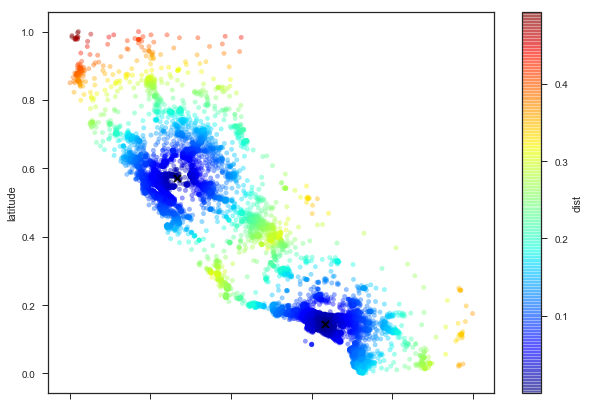

In [142]:
only_coords.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
                figsize=(10,7),#label=clusters,
                c="dist",cmap=plt.get_cmap("jet"),colorbar=True,)
centers = np.array(centroids)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='black')
plt.legend()

In [109]:
optimized_df = binaryagecats_rooms_pophouse_comb.copy()

In [130]:
optimized_df["dist"] = only_coords["dist"]

In [131]:
optimized_df.drop(["longitude","latitude"],axis=1,inplace=True)

In [134]:
optimized_df = optimized_df[['dist','bedr_per_rooms', 'househ_per_pop', 'median_income','<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN','age1','age2','age3','age4','age5','median_house_value']]
optimized_df.head()

dist  bedr_per_rooms  househ_per_pop  median_income  <1H OCEAN  INLAND  \
0  0.055608        0.146591        0.391304         8.3252        0.0     0.0   
1  0.054879        0.155797        0.473969         8.3014        0.0     0.0   
2  0.057007        0.129516        0.356855         7.2574        0.0     0.0   
3  0.057991        0.184458        0.392473         5.6431        0.0     0.0   
4  0.057991        0.172096        0.458407         3.8462        0.0     0.0   

   ISLAND  NEAR BAY  NEAR OCEAN  age1  age2  age3  age4  age5  \
0     0.0       1.0         0.0   0.0   0.0   0.0   1.0   0.0   
1     0.0       1.0         0.0   0.0   1.0   0.0   0.0   0.0   
2     0.0       1.0         0.0   0.0   0.0   0.0   0.0   1.0   
3     0.0       1.0         0.0   0.0   0.0   0.0   0.0   1.0   
4     0.0       1.0         0.0   0.0   0.0   0.0   0.0   1.0   

   median_house_value  
0              452600  
1              358500  
2              352100  
3              341300  
4              342200

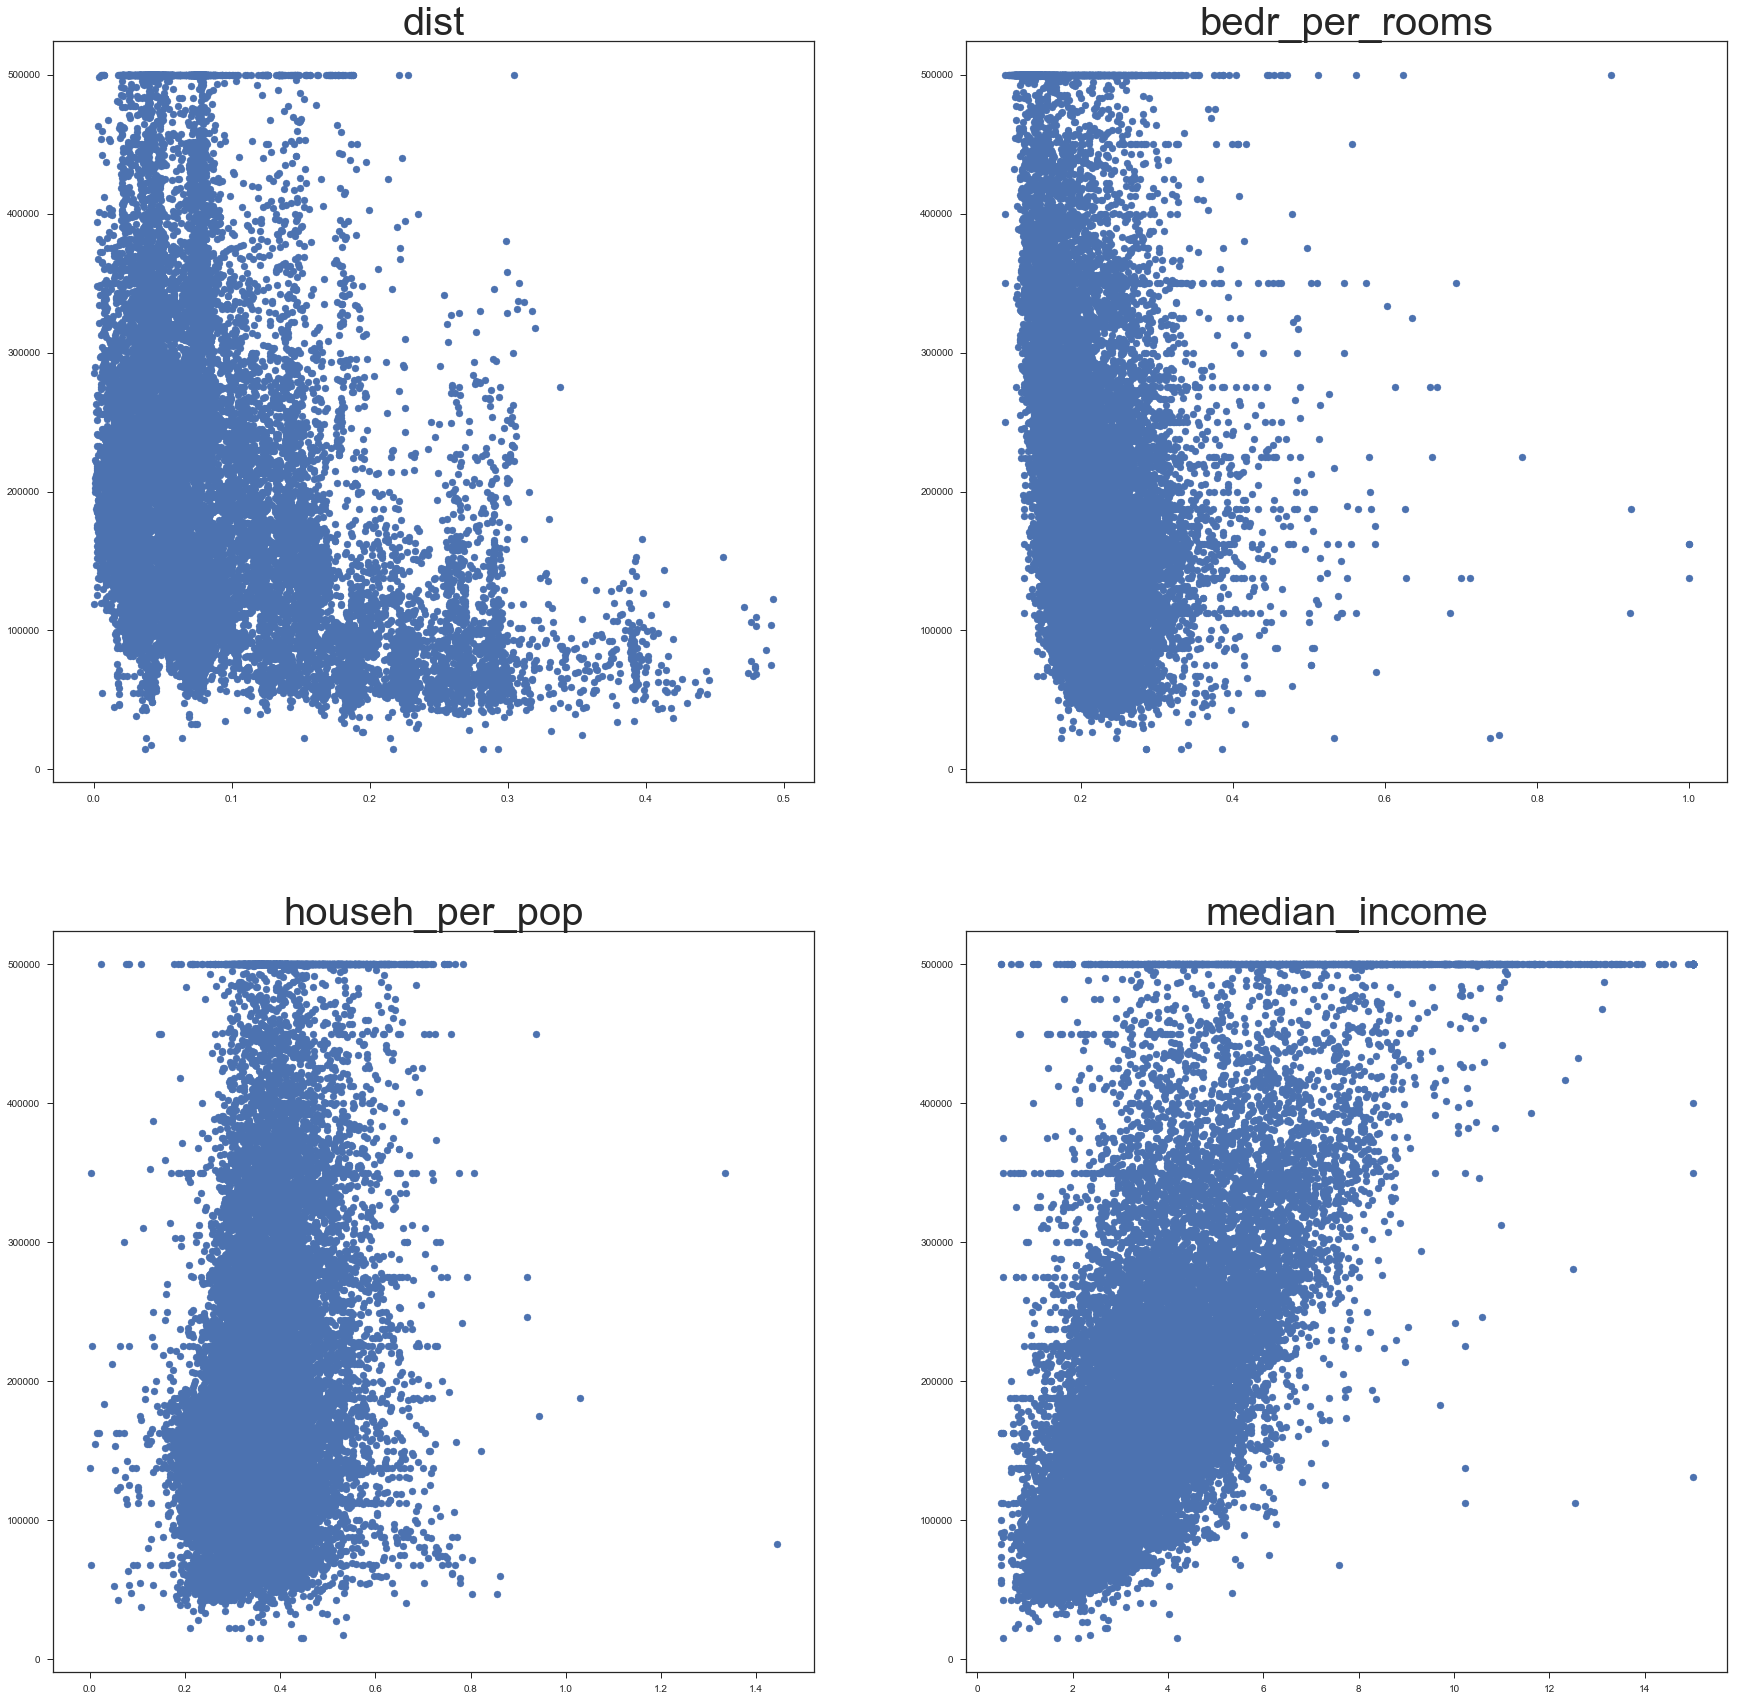

In [141]:
fig = plt.figure(figsize = (30,30))
for col in range(0,4):
    plt.subplot(2,2,col+1)
    plt.scatter(optimized_df.iloc[:,col],optimized_df["median_house_value"])
    plt.title(optimized_df.columns[col],fontsize=40)

In [135]:
class ItsMagic: 
    def __init__(self):
        self.results = pd.DataFrame() # contains the predicted ys
        self.input_data = {} # dict of dicts, contains the input data frames
        self.algo_names = [] # list of all algo names that were added
        self.algos = {} # dict of dicts, contains the algo names and algos
        self.analysis_summaries = {} # contains all analyses that have already been run and details about them 
                                        # (i.e. which algo and input data was used)

    def add_input_prep(self, input_data_name, input_data, colidx_with_cont_data = list(range(0,8))):
        """accepts an input data frame, splits in training and test, scales the continuous features,
        and stores the input df in input_data. colidx.. should be a list of column indices of continous features
        input_data should be a manipulated version of data_new (i.e. ocean proximity 
        already converted, NaNs in total bedrooms already dropped,index reset.)"""
        if input_data_name not in self.input_data:
            self.input_data[input_data_name] = {'raw_data': input_data}

            #split in train and test
            splitdata = {}
            self.input_data[input_data_name]["prep_data"] = splitdata
            splitdata["train_X"], splitdata["test_X"], splitdata["train_y"],splitdata["test_y"] = train_test_split(self.input_data[input_data_name]["raw_data"].loc[:, self.input_data[input_data_name]["raw_data"].columns != 'median_house_value'],\
                                                               self.input_data[input_data_name]["raw_data"]["median_house_value"], test_size=0.2, random_state=42)
            nr_features = splitdata["train_X"].shape[1]

            if colidx_with_cont_data:
                #standard scaling of continuous variables
                scaler = preprocessing.StandardScaler()
                train_df_cont = self.input_data[input_data_name]["prep_data"]["train_X"].iloc[:,colidx_with_cont_data]
                scaler.fit(train_df_cont) 
                self.input_data[input_data_name]["prep_data"]["train_X"].iloc[:,colidx_with_cont_data] = scaler.transform(train_df_cont)
                self.input_data[input_data_name]["prep_data"]["test_X"].iloc[:,colidx_with_cont_data] = scaler.transform(self.input_data[input_data_name]["prep_data"]["test_X"].iloc[:,colidx_with_cont_data])
            
            print(f"Input data: {input_data_name}.")
            print(f"Scaled {len(colidx_with_cont_data)} features.")
            print(f"The scaled features are: {splitdata['train_X'].iloc[:,colidx_with_cont_data].columns.values}")
            colindices = list(range(0,splitdata['train_X'].shape[1]))
            condition = [c not in colidx_with_cont_data for c in colindices]
            not_scaled = self.input_data[input_data_name]['prep_data']['train_X'].iloc[:,condition].columns.values 
            print(f"Did NOT scale these ones: {not_scaled}")
  
            return self.input_data
        else:
            print("Input data name already exists!")
    
    def run_analysis(self,analysis_name,input_data_name,algo_name,):
        """runs an analysis with a given input_data and algo_name. Calculates error rates and stores
        them in self.analysis_summaries. For LinReg, also calculates beta coefficients."""
        
        if analysis_name not in self.analysis_summaries:
            self.analysis_summaries[analysis_name] = {"input_data_name":input_data_name,"algo_name":algo_name,"fit":-1}
            
            # get the data from input_data
            train_X, test_X, train_y, test_y = self.input_data[input_data_name]['prep_data']["train_X"],\
                self.input_data[input_data_name]['prep_data']["test_X"],\
                self.input_data[input_data_name]['prep_data']["train_y"],\
                self.input_data[input_data_name]['prep_data']["test_y"]
            
            if self.analysis_summaries[analysis_name]['fit'] == -1:
                print("self analysis summary is -1")
                self.analysis_summaries[analysis_name]['fit'] = self.algos[algo_name]['algo'].fit(train_X, train_y) 
                pred = self.algos[algo_name]['algo'].predict(test_X)
                self.results[analysis_name] = pred 
                
                # error and r2 calculation
                mse= mean_squared_error(pred,test_y)
                rmse = np.sqrt(mse)
                self.analysis_summaries[analysis_name]["RMSE"] = rmse
                R2 = self.analysis_summaries[analysis_name]['fit'].score(test_X, test_y)
                self.analysis_summaries[analysis_name]["R2"] = R2
                rss = (sum((pred - test_y)**2))
                rse = np.sqrt(rss/(test_X.shape[0]-test_X.shape[1]))
                self.analysis_summaries[analysis_name]["RSE"] = rse
                print(f"RSE: {rse}")
                print(f"RMSE: {rmse}")
                print(f"R2: {R2}")
                if isinstance(self.algos[algo_name]["algo"],linear_model.base.LinearRegression):
                    betas = self.analysis_summaries[analysis_name]['fit'].coef_
                    betas_df = pd.DataFrame(data = betas.reshape(1,train_X.shape[1]),columns = train_X.columns)
                    self.analysis_summaries[analysis_name]["betas"] = betas_df
        else: print("Analysis name already exists!")
    
    def run_all_combis(self):
        for i in self.input_data.keys():
            for a in self.algos:
                print(a)
                ananame = str(a) + "_" + str(i)
                print(f"\nRunning {ananame} analysis...")
                self.run_analysis(ananame,i,a)
                print("Finished!")
                      
    def calculate_error_rates(self):
        """returns a df with R2, RMSE and RSE for each analysis (i.e. each combination of 
        input_data and algo that was run with run_analysis)"""
        rates = pd.DataFrame(columns = ["Input DF","Algo Name","R2","RMSE","RSE"],index = self.analysis_summaries.keys())
        for ana in self.analysis_summaries:
            rates.loc[ana,"Input DF"] = self.analysis_summaries[ana]["input_data_name"]
            rates.loc[ana,"Algo Name"] = self.analysis_summaries[ana]["algo_name"]
            rates.loc[ana,"R2"] = self.analysis_summaries[ana]["R2"]
            rates.loc[ana,"RMSE"] = self.analysis_summaries[ana]["RMSE"]
            rates.loc[ana,"RSE"] = self.analysis_summaries[ana]["RSE"]
        #display(rates)
        return rates
    
    def pretty_barplots(self):
        "prints a barplot sumarizing the error rates and R2 for the analyses that were run before"
        pass
         
    def add_algo(self, algo, algo_name):
        """adds a new algo including its configurations (e.g. n_neighbors). Needs to be
        given a unique name"""
        if algo_name not in self.algo_names:
            self.algo_names.append(algo_name)
            self.algos[algo_name] = {'algo_name': algo_name, 'algo': algo}
        else: print("This algo config already exists!!")
            
    def delete_input_data(self,input_data_name):
        self.input_data.pop(input_data_name,None) # None means nothing happens if key not found
        print(f"{input_data_name} was deleted")
        
    def get_results(self):
        return self.results
        

In [176]:
#input_data.loc[:, input_data.columns != 'median_house_value']

In [177]:
data_new.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  <1H OCEAN  INLAND  ISLAND  NEAR BAY  \
0         322         126         8.3252        0.0     0.0     0.0       1.0   
1        2401        1138         8.3014        0.0     0.0     0.0       1.0   
2         496         177         7.2574        0.0     0.0     0.0       1.0   
3         558         219         5.6431        0.0     0.0     0.0       1.0   
4         565         259         3.8462        0.0     0.0     0.0       1.0   

   NEAR OCEAN  median_house_value  
0         0.0              452600  
1         0.0              358500  
2         0.0              352100  
3         0.0              341300  
4         0.0              342200

In [137]:
analysis_new = ItsMagic()
analysis_new.add_input_prep("agecats_data",agecats_data,list(range(0,8)))
analysis_new.add_input_prep("optimized",optimized_df,list(range(0,4)))
analysis_new.add_input_prep("agecats_rooms_pophouse_comb",agecats_rooms_pophouse_comb,list(range(0,6)))
analysis_new.add_algo(linear_model.LinearRegression(),'standard_linreg')
analysis_new.add_algo(KNeighborsRegressor(n_neighbors=10), 'knr_10')
analysis_new.add_input_prep("binaryagecats_rooms_pophouse_comb",binaryagecats_rooms_pophouse_comb,[0,1,2,3,4])

Input data: agecats_data.
Scaled 8 features.
The scaled features are: ['longitude' 'latitude' 'age_cat' 'total_rooms' 'total_bedrooms'
 'population' 'households' 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Input data: optimized.
Scaled 4 features.
The scaled features are: ['dist' 'bedr_per_rooms' 'househ_per_pop' 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN' 'age1' 'age2'
 'age3' 'age4' 'age5']
Input data: agecats_rooms_pophouse_comb.
Scaled 6 features.
The scaled features are: ['longitude' 'latitude' 'age_cat' 'bedr_per_rooms' 'househ_per_pop'
 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Input data: binaryagecats_rooms_pophouse_comb.
Scaled 5 features.
The scaled features are: ['longitude' 'latitude' 'bedr_per_rooms' 'househ_per_pop' 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OC

{'agecats_data': {'raw_data':        longitude  latitude  age_cat  total_rooms  total_bedrooms  population  \
  0        -122.23     37.88      4.0          880           129.0         322   
  1        -122.22     37.86      2.0         7099          1106.0        2401   
  2        -122.24     37.85      5.0         1467           190.0         496   
  3        -122.25     37.85      5.0         1274           235.0         558   
  4        -122.25     37.85      5.0         1627           280.0         565   
  5        -122.25     37.85      5.0          919           213.0         413   
  6        -122.25     37.84      5.0         2535           489.0        1094   
  7        -122.25     37.84      5.0         3104           687.0        1157   
  8        -122.26     37.84      4.0         2555           665.0        1206   
  9        -122.25     37.84      5.0         3549           707.0        1551   
  10       -122.26     37.85      5.0         2202           434.0    

In [138]:
analysis_new.add_input_prep("rooms_pophouse_comb",rooms_pophouse_comb,[0,1,2,3,4,5])
analysis_new.add_input_prep("orig_data",data_new,list(range(0,8)))
analysis_new.add_input_prep("only_coords",data_new.iloc[:,[0,1,13]],[0,1])

Input data: rooms_pophouse_comb.
Scaled 6 features.
The scaled features are: ['longitude' 'latitude' 'housing_median_age' 'bedr_per_rooms'
 'househ_per_pop' 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Input data: orig_data.
Scaled 8 features.
The scaled features are: ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Input data: only_coords.
Scaled 2 features.
The scaled features are: ['longitude' 'latitude']
Did NOT scale these ones: []


{'agecats_data': {'raw_data':        longitude  latitude  age_cat  total_rooms  total_bedrooms  population  \
  0        -122.23     37.88      4.0          880           129.0         322   
  1        -122.22     37.86      2.0         7099          1106.0        2401   
  2        -122.24     37.85      5.0         1467           190.0         496   
  3        -122.25     37.85      5.0         1274           235.0         558   
  4        -122.25     37.85      5.0         1627           280.0         565   
  5        -122.25     37.85      5.0          919           213.0         413   
  6        -122.25     37.84      5.0         2535           489.0        1094   
  7        -122.25     37.84      5.0         3104           687.0        1157   
  8        -122.26     37.84      4.0         2555           665.0        1206   
  9        -122.25     37.84      5.0         3549           707.0        1551   
  10       -122.26     37.85      5.0         2202           434.0    

In [139]:
analysis_new.run_all_combis()

standard_linreg

Running standard_linreg_agecats_data analysis...
self analysis summary is -1
RSE: 69370.43405427395
RMSE: 69260.01884590756
R2: 0.649222172226836
Finished!
knr_10

Running knr_10_agecats_data analysis...
self analysis summary is -1
RSE: 61504.85201756275
RMSE: 61406.95626206358
R2: 0.724258542803475
Finished!
standard_linreg

Running standard_linreg_optimized analysis...
self analysis summary is -1
RSE: 67185.3424854178
RMSE: 67070.17222872839
R2: 0.6710531236720082
Finished!
knr_10

Running knr_10_optimized analysis...
self analysis summary is -1
RSE: 57582.49503844971
RMSE: 57483.7861461668
R2: 0.7583662167691892
Finished!
standard_linreg

Running standard_linreg_agecats_rooms_pophouse_comb analysis...
self analysis summary is -1
RSE: 66758.31628874081
RMSE: 66668.4170646091
R2: 0.6749821517215274
Finished!
knr_10

Running knr_10_agecats_rooms_pophouse_comb analysis...
self analysis summary is -1
RSE: 57345.29589826428
RMSE: 57268.07259642802
R2: 0.7601763230614397
F

In [140]:
analysis_new.calculate_error_rates().sort_values(["R2","RMSE"],ascending=[False,True])

Input DF  \
knr_10_only_coords                                                       only_coords   
knr_10_rooms_pophouse_comb                                       rooms_pophouse_comb   
knr_10_agecats_rooms_pophouse_comb                       agecats_rooms_pophouse_comb   
knr_10_optimized                                                           optimized   
knr_10_binaryagecats_rooms_pophouse_comb           binaryagecats_rooms_pophouse_comb   
knr_10_orig_data                                                           orig_data   
knr_10_agecats_data                                                     agecats_data   
standard_linreg_binaryagecats_rooms_pophouse_comb  binaryagecats_rooms_pophouse_comb   
standard_linreg_agecats_rooms_pophouse_comb              agecats_rooms_pophouse_comb   
standard_linreg_rooms_pophouse_comb                              rooms_pophouse_comb   
standard_linreg_optimized                                                  optimized   
standard_linreg_agecats_data                                            agecats_data   
standard_linreg_orig_data                                                  orig_data   
standard_linreg_only_coords                                              only_coords   

                                                         Algo Name        R2  \
knr_10_only_coords                                          knr_10  0.796577   
knr_10_rooms_pophouse_comb                                  knr_10  0.766324   
knr_10_agecats_rooms_pophouse_comb                          knr_10  0.760176   
knr_10_optimized                                            knr_10  0.758366   
knr_10_binaryagecats_rooms_pophouse_comb                    knr_10  0.756613   
knr_10_orig_data                                            knr_10  0.727927   
knr_10_agecats_data                                         knr_10  0.724259   
standard_linreg_binaryagecats_rooms_pophouse_comb  standard_linreg  0.675703   
standard_linreg_agecats_rooms_pophouse_comb        standard_linreg  0.674982   
standard_linreg_rooms_pophouse_comb                standard_linreg   0.67455   
standard_linreg_optimized                          standard_linreg  0.671053   
standard_linreg_agecats_data                       standard_linreg  0.649222   
standard_linreg_orig_data                          standard_linreg   0.64884   
standard_linreg_only_coords                        standard_linreg  0.245755   

                                                      RMSE      RSE  
knr_10_only_coords                                 52743.2  52756.1  
knr_10_rooms_pophouse_comb                         56529.3  56605.5  
knr_10_agecats_rooms_pophouse_comb                 57268.1  57345.3  
knr_10_optimized                                   57483.8  57582.5  
knr_10_binaryagecats_rooms_pophouse_comb           57691.9  57798.1  
knr_10_orig_data                                   60997.2  61094.4  
knr_10_agecats_data                                  61407  61504.9  
standard_linreg_binaryagecats_rooms_pophouse_comb  66594.5    66717  
standard_linreg_agecats_rooms_pophouse_comb        66668.4  66758.3  
standard_linreg_rooms_pophouse_comb                66712.7  66802.7  
standard_linreg_optimized                          67070.2  67185.3  
standard_linreg_agecats_data                         69260  69370.4  
standard_linreg_orig_data                          69297.7  69408.2  
standard_linreg_only_coords                         101560   101585

In [26]:
analysis = ItsMagic()
analysis.add_input_prep("orig_data",data_new,list(range(0,8)))
analysis.add_input_prep("no_coords",data_new.iloc[:,list(range(2,14))],list(range(0,6)))
analysis.add_input_prep("orig_data",data_new,list(range(0,8))) # is not added again (already exists)
analysis.add_input_prep("no_oceanprox",data_new.iloc[:,[0,1,2,3,4,5,6,7,13]],list(range(0,8)))
analysis.add_input_prep("only_income",data_new.iloc[:,[7,13]],[0])
analysis.add_input_prep("only_coords",data_new.iloc[:,[0,1,13]],[0,1])
analysis.add_input_prep("only_long",data_new.iloc[:,[0,13]],[0])
analysis.add_input_prep("rooms_combined",rooms_combined,list(range(0,7)))
analysis.add_input_prep("coords_income",data_new.iloc[:,[0,1,7,13]],[0,1,2])
analysis.add_input_prep("rooms_pophouse_comb",rooms_pophouse_comb,[0,1,2,3,4,5])

analysis.input_data

Input data: orig_data.
Scaled 8 features.
The scaled features are: ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Input data: no_coords.
Scaled 6 features.
The scaled features are: ['housing_median_age' 'total_rooms' 'total_bedrooms' 'population'
 'households' 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']
Input data name already exists!
Input data: no_oceanprox.
Scaled 8 features.
The scaled features are: ['longitude' 'latitude' 'housing_median_age' 'total_rooms'
 'total_bedrooms' 'population' 'households' 'median_income']
Did NOT scale these ones: []
Input data: only_income.
Scaled 1 features.
The scaled features are: ['median_income']
Did NOT scale these ones: []
Input data: only_coords.
Scaled 2 features.
The scaled features are: ['longitude' 'latitude']
Did NOT scale these ones

{'orig_data': {'raw_data':        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
  0        -122.23     37.88                  41          880           129.0   
  1        -122.22     37.86                  21         7099          1106.0   
  2        -122.24     37.85                  52         1467           190.0   
  3        -122.25     37.85                  52         1274           235.0   
  4        -122.25     37.85                  52         1627           280.0   
  5        -122.25     37.85                  52          919           213.0   
  6        -122.25     37.84                  52         2535           489.0   
  7        -122.25     37.84                  52         3104           687.0   
  8        -122.26     37.84                  42         2555           665.0   
  9        -122.25     37.84                  52         3549           707.0   
  10       -122.26     37.85                  52         2202           434.0   
  1

In [27]:
analysis.add_algo(KNeighborsRegressor(n_neighbors=1), 'knr_1') 
analysis.add_algo(KNeighborsRegressor(n_neighbors=2), 'knr_2')
analysis.add_algo(KNeighborsRegressor(n_neighbors=3), 'knr_3')
analysis.add_algo(KNeighborsRegressor(n_neighbors=4), 'knr_4')
analysis.add_algo(KNeighborsRegressor(n_neighbors=5), 'knr_5')
analysis.add_algo(KNeighborsRegressor(n_neighbors=6), 'knr_6')
analysis.add_algo(KNeighborsRegressor(n_neighbors=7), 'knr_7')
analysis.add_algo(KNeighborsRegressor(n_neighbors=10), 'knr_10')
analysis.add_algo(KNeighborsRegressor(n_neighbors=125), 'knr_125')
analysis.add_algo(linear_model.LinearRegression(),'standard_linreg')
analysis.algos

{'knr_1': {'algo_name': 'knr_1',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=1, p=2,
            weights='uniform')},
 'knr_2': {'algo_name': 'knr_2',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=2, p=2,
            weights='uniform')},
 'knr_3': {'algo_name': 'knr_3',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=3, p=2,
            weights='uniform')},
 'knr_4': {'algo_name': 'knr_4',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=4, p=2,
            weights='uniform')},
 'knr_5': {'algo_name': 'knr_5',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_n

In [28]:
analysis.delete_input_data('rooms_pophouse_comb')

rooms_pophouse_comb was deleted


In [29]:
analysis.add_input_prep("rooms_pophouse_comb",rooms_pophouse_comb,[0,1,2,3,4,5])

Input data: rooms_pophouse_comb.
Scaled 6 features.
The scaled features are: ['longitude' 'latitude' 'housing_median_age' 'bedr_per_rooms'
 'househ_per_pop' 'median_income']
Did NOT scale these ones: ['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


{'orig_data': {'raw_data':        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
  0        -122.23     37.88                  41          880           129.0   
  1        -122.22     37.86                  21         7099          1106.0   
  2        -122.24     37.85                  52         1467           190.0   
  3        -122.25     37.85                  52         1274           235.0   
  4        -122.25     37.85                  52         1627           280.0   
  5        -122.25     37.85                  52          919           213.0   
  6        -122.25     37.84                  52         2535           489.0   
  7        -122.25     37.84                  52         3104           687.0   
  8        -122.26     37.84                  42         2555           665.0   
  9        -122.25     37.84                  52         3549           707.0   
  10       -122.26     37.85                  52         2202           434.0   
  1

In [30]:
analysis.run_all_combis()

knr_1

Running knr_1_orig_data analysis...
self analysis summary is -1
RSE: 74209.67083971556
RMSE: 74091.55313755218
R2: 0.5985750878017553
Finished!
knr_2

Running knr_2_orig_data analysis...
self analysis summary is -1
RSE: 66337.71388842567
RMSE: 66232.12578592356
R2: 0.6792221942252004
Finished!
knr_3

Running knr_3_orig_data analysis...
self analysis summary is -1
RSE: 64063.79838025919
RMSE: 63961.82961296867
R2: 0.7008364487866838
Finished!
knr_4

Running knr_4_orig_data analysis...
self analysis summary is -1
RSE: 62537.10077992321
RMSE: 62437.5620195366
R2: 0.7149252202266573
Finished!
knr_5

Running knr_5_orig_data analysis...
self analysis summary is -1
RSE: 62360.257805145724
RMSE: 62261.00052135916
R2: 0.7165352146660182
Finished!
knr_6

Running knr_6_orig_data analysis...
self analysis summary is -1
RSE: 62107.88251316692
RMSE: 62009.02692890537
R2: 0.7188249661318942
Finished!
knr_7

Running knr_7_orig_data analysis...
self analysis summary is -1
RSE: 61483.40459706858


RSE: 105564.33626828689
RMSE: 105551.42082977715
R2: 0.18530492477651395
Finished!
knr_6

Running knr_6_only_long analysis...
self analysis summary is -1
RSE: 104239.53218356323
RMSE: 104226.77883033942
R2: 0.20562502278353367
Finished!
knr_7

Running knr_7_only_long analysis...
self analysis summary is -1
RSE: 103236.52057868065
RMSE: 103223.88994052503
R2: 0.22083871349445416
Finished!
knr_10

Running knr_10_only_long analysis...
self analysis summary is -1
RSE: 101196.01151998973
RMSE: 101183.63053119679
R2: 0.2513351561744186
Finished!
knr_125

Running knr_125_only_long analysis...
self analysis summary is -1
RSE: 97264.8592021637
RMSE: 97252.95917652412
R2: 0.30837199035498086
Finished!
standard_linreg

Running standard_linreg_only_long analysis...
self analysis summary is -1
RSE: 116900.61242042198
RMSE: 116886.31002697257
R2: 0.0009339046062319944
Finished!
knr_1

Running knr_1_rooms_combined analysis...
self analysis summary is -1
RSE: 74783.24307786762
RMSE: 74673.37537444863


In [31]:
res_allcombis = analysis.calculate_error_rates()

In [32]:
with pd.option_context('display.max_rows', 1000, 'display.max_columns', 300):
    display(res_allcombis.sort_values(["R2","RMSE"],ascending=[False,True]))

Input DF        Algo Name  \
knr_10_only_coords                           only_coords           knr_10   
knr_6_only_coords                            only_coords            knr_6   
knr_7_only_coords                            only_coords            knr_7   
knr_5_only_coords                            only_coords            knr_5   
knr_4_only_coords                            only_coords            knr_4   
knr_3_only_coords                            only_coords            knr_3   
knr_6_coords_income                        coords_income            knr_6   
knr_7_coords_income                        coords_income            knr_7   
knr_10_rooms_pophouse_comb           rooms_pophouse_comb           knr_10   
knr_10_coords_income                       coords_income           knr_10   
knr_2_only_coords                            only_coords            knr_2   
knr_5_coords_income                        coords_income            knr_5   
knr_7_rooms_pophouse_comb            rooms_pophouse_comb            knr_7   
knr_4_coords_income                        coords_income            knr_4   
knr_6_rooms_pophouse_comb            rooms_pophouse_comb            knr_6   
knr_5_rooms_pophouse_comb            rooms_pophouse_comb            knr_5   
knr_3_coords_income                        coords_income            knr_3   
knr_4_rooms_pophouse_comb            rooms_pophouse_comb            knr_4   
knr_125_rooms_pophouse_comb          rooms_pophouse_comb          knr_125   
knr_7_rooms_combined                      rooms_combined            knr_7   
knr_6_rooms_combined                      rooms_combined            knr_6   
knr_10_rooms_combined                     rooms_combined           knr_10   
knr_10_orig_data                               orig_data           knr_10   
knr_5_rooms_combined                      rooms_combined            knr_5   
knr_2_coords_income                        coords_income            knr_2   
knr_7_orig_data                                orig_data            knr_7   
knr_3_rooms_pophouse_comb            rooms_pophouse_comb            knr_3   
knr_4_rooms_combined                      rooms_combined            knr_4   
knr_6_orig_data                                orig_data            knr_6   
knr_7_no_oceanprox                          no_oceanprox            knr_7   
knr_6_no_oceanprox                          no_oceanprox            knr_6   
knr_5_orig_data                                orig_data            knr_5   
knr_4_orig_data                                orig_data            knr_4   
knr_5_no_oceanprox                          no_oceanprox            knr_5   
knr_10_no_oceanprox                         no_oceanprox           knr_10   
knr_1_only_coords                            only_coords            knr_1   
knr_4_no_oceanprox                          no_oceanprox            knr_4   
knr_3_rooms_combined                      rooms_combined            knr_3   
knr_3_orig_data                                orig_data            knr_3   
knr_3_no_oceanprox                          no_oceanprox            knr_3   
knr_2_rooms_pophouse_comb            rooms_pophouse_comb            knr_2   
knr_10_no_coords                               no_coords           knr_10   
knr_7_no_coords                                no_coords            knr_7   
knr_6_no_coords                                no_coords            knr_6   
knr_2_rooms_combined                      rooms_combined            knr_2   
knr_5_no_coords                                no_coords            knr_5   
knr_2_orig_data                                orig_data            knr_2   
knr_125_orig_data                              orig_data          knr_125   
knr_125_rooms_combined                    rooms_combined          knr_125   
standard_linreg_rooms_pophouse_comb  rooms_pophouse_comb  standard_linreg   
knr_2_no_oceanprox                          no_oceanprox            knr_2   
knr_125_coords_income                      c

In [33]:
#analysis.run_analysis('knr1_orig','orig_data','knr_1')

In [34]:
best_r2 = res_allcombis.sort_values("R2",ascending=False).iloc[0:15,:]
#display(best_r2)
lowest_rmse = res_allcombis.sort_values("RMSE").iloc[0:15,:]
#display(lowest_rmse)

### Kalibrierung des Modells

In [44]:
analysis.results["standard_linreg_rooms_pophouse_comb"].mean()

206223.7961712166

In [48]:
analysis.input_data["rooms_pophouse_comb"]["prep_data"]["test_y"].mean()

207744.35771959872

# Pickling of the created analysis object

In [36]:
# open the file for writing
fileObject = open("analysis_pickled",'wb') 
# this writes the object analysis to the
# file named 'analysis_pickled'
pickle.dump(analysis,fileObject)
# here we close the fileObject
fileObject.close()

In [37]:
# we open the file for reading
fileObject = open("analysis_pickled",'rb')  
# load the object from the file into var b
loaded_analysis = pickle.load(fileObject)
# here we close the fileObject
fileObject.close()

In [38]:
loaded_analysis.algos

{'knr_1': {'algo_name': 'knr_1',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=1, p=2,
            weights='uniform')},
 'knr_2': {'algo_name': 'knr_2',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=2, p=2,
            weights='uniform')},
 'knr_3': {'algo_name': 'knr_3',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=3, p=2,
            weights='uniform')},
 'knr_4': {'algo_name': 'knr_4',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=4, p=2,
            weights='uniform')},
 'knr_5': {'algo_name': 'knr_5',
  'algo': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_n

# ToDo

In [39]:
# incorporate feature selector for LinReg

#http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html